In [33]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [38]:
def imgscaler(image, height=256, width=128):
    #scale the image up to batch_size and pad remaining
    
    hscaler = height/image.shape[0]
    wscaler = width/image.shape[1]
    scaler = np.zeros(2)
    if hscaler > wscaler:
        image = cv2.resize(image,dsize=(0,0),fx=wscaler,fy=wscaler,interpolation=cv2.INTER_LINEAR)
        pad =  height - image.shape[0]
        top = int(np.floor(pad * 0.5))
        bottom = int(pad-top)
        image = np.pad(image, ((top,bottom),(0,0),(0,0)), 'constant', constant_values=(0,0))


    elif hscaler < wscaler:
        image = cv2.resize(image,dsize=(0,0),fx=hscaler,fy=hscaler,interpolation=cv2.INTER_LINEAR)
        pad = width - image.shape[1]
        left = int(np.floor(pad * 0.5))
        right = int(pad-left)
        image = np.pad(image, ((0,0),(left,right),(0,0)), 'constant', constant_values=(0,0))

    else:
        #Perfect fit no padding needed
        image = cv2.resize(image,dsize=(0,0),fx=wscaler,fy=hscaler,interpolation=cv2.INTER_LINEAR)
    return image
    
    

In [39]:
def masker(img):
    #create a simple mask, and make everything else 0
    mask = np.zeros((image.shape[0],image.shape[1]))
    temp_blue = image[:,:,1].copy()
    temp_blue[temp_blue==0] = 1
    mask[image[:,:,4]/temp_blue >= 1] = 1
    mask[image[:,:,4] >= 40] = 1
    mask[:5,:5] = 0
    image[mask==0] = 0
    return image, mask

In [137]:
path = '/zhome/27/c/138037/eyefoss-project-blobs/'
classes = {'Broken':1} #{'Barley':0, 'Broken':1, 'Oat':2, 'Rye':3, 'Wheat':4}

# init feature extraction dataset samples = 66000, height, width, average-channel-intensity, mask-size, class
data = np.zeros(5).reshape(1,5)
for category in list(classes.keys()):
    print(category)
    file_paths = next(os.walk(path  + category))[2]
    i = 0
    for file in file_paths:
        #print(file)
        image, mask = masker(np.load(os.path.join(path + category + '/' + file)))
        intensity = np.mean(image[np.ma.where(image)])
        size = len(np.where(mask)[0]) / (image.shape[0]*image.shape[1]) 
        min_x = np.min(np.where(mask)[1])
        max_x = np.max(np.where(mask)[1])
        min_y = np.min(np.where(mask)[0])
        max_y = np.max(np.where(mask)[0])
        height = max_y-min_y
        width = max_x-min_x
        data = np.append(data, [[height,width,intensity,size,classes[category]]], axis=0)
        i += 1

Broken


In [138]:
data[1:6]

array([[ 68.        ,  47.        ,  79.15218864,   0.4656671 ,
          1.        ],
       [109.        ,  52.        ,  70.15495048,   0.47047995,
          1.        ],
       [ 60.        ,  43.        ,  74.02595702,   0.51923077,
          1.        ],
       [ 91.        ,  66.        ,  68.22838753,   0.53423276,
          1.        ],
       [143.        ,  54.        ,  96.83610165,   0.47863248,
          1.        ]])

(array([ 5,  6,  7, ..., 73, 73, 73]), array([31, 31, 30, ..., 20, 28, 29]))


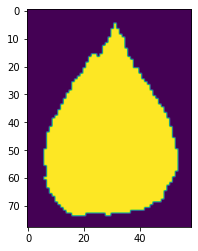

38.17492394611039
79.15218864344762


In [108]:
print(np.ma.where(mask))
#print(sorted(np.ma.where(mask)[1]))
plt.imshow(mask)
plt.show()
print(np.mean(image[:,:,4]))
print(np.mean(image[np.ma.where(image)]))

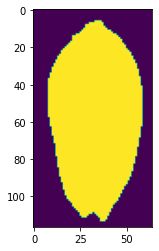

(57.32198611551609, 31.03300518925519)


In [61]:
#Print images of kernels
image, mask = masker(np.load(os.path.join(path + category + '/' + file_paths[0])))
plt.imshow(image[:,:,[4,2,1]])
plt.imshow(mask)
plt.show()
len(np.where(mask)[0])
len(np.where(mask)[0]) / (image.shape[0]*image.shape[1]) 
masked = np.ma.where(image)
print((np.mean(image[masked]),
np.mean(image)))

In [51]:
path = os.path.join(cwd, os.listdir(cwd)[10000])
image = np.load(path)


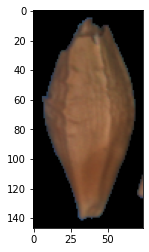

(array([  5,   5,   5, ..., 140, 141, 141]), array([36, 37, 38, ..., 39, 32, 33]))


In [95]:
scaled_image = imgscaler(image, 256,128)
scaled_img, scaled_mask = masker(scaled_image)
img, mask = masker(image)
plt.imshow(img[:,:,[4,2,1]])
plt.show()
print(np.where(mask == 1))

#plt.imshow(scaled_img[:,:,[4,2,1]])
#plt.show()
#print(np.where(scaled_mask == 1))

In [89]:
min_x = np.min(np.where(mask)[1])
max_x = np.max(np.where(mask)[1])
print(min_x,max_x)
min_y = np.min(np.where(mask)[0])
max_y = np.max(np.where(mask)[0])
print(min_y,max_y)

6 73
5 141


In [67]:
coloumns = np.where(mask == 1)[0][1] + (mask.shape[0] - np.where(scaled_mask == 1)[0][-1])
rows = np.where(mask == 1)[1][1] + (mask.shape[1] - np.where(scaled_mask == 1)[1][-1])
print(f'coloumns={coloumns} \nrows={rows} \n# of pixels removed={coloumns * rows}')

coloumns=-93 
rows=52 
# of pixels removed=-4836


In [90]:
mask.shape

(147, 74)

In [93]:
np.where(mask)[0][-1]

141

In [30]:
import numpy as np
from itertools import combinations
temp = ['UV','Near IR', '3D']
a = combinations(temp, 2)

In [31]:


[' '.join(temp[i:j]) for i, j in combinations(range(len(temp) + 1), 2)]

['UV', 'UV Near IR', 'UV Near IR 3D', 'Near IR', 'Near IR 3D', '3D']